#  Loading the NIPS papers

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2937a019c5844ce194bcc61e3bba2bc2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hOOr3jgpr8N6Z4NuHiFUDIBU0Lnl4Mw_gBXcbpxOUv79',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2937a019c5844ce194bcc61e3bba2bc2.get_object(Bucket='naturallanguageprocessing-donotdelete-pr-vauvhurhibnfx2',Key='papers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

papers = pd.read_csv(body)
papers.head()





,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [2]:
papers.shape

(7241, 7)

#  Preparing the data for analysis

In [3]:
# For the analysis of the papers, we are only interested in the text data associated with the paper as well as the year the paper was published in.
# We will analyze this text data using natural language processing. 

# Since the file contains some metadata such as id's and filenames, it is necessary to remove all the columns that do not contain useful text information.

# Remove the columns
papers.drop(['id', 'event_type', 'pdf_name'], axis=1, inplace=True)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# Plotting how machine learning has evolved over time

In [4]:
## We will begin by visualizing the number of publications per year.
## By looking at the number of published papers per year, we can understand the extent of the machine learning 'revolution'!
## Typically, this significant increase in popularity is attributed to the large amounts of compute power, data and improvements in algorithms.

## Group the papers by year
groups = papers.groupby('year')

In [5]:
## Determine the size of each group
counts = groups.size()


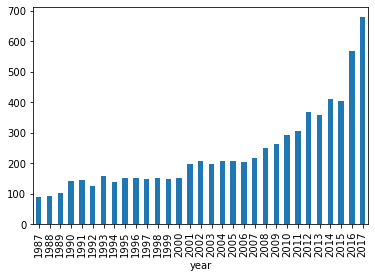

In [6]:
## Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar')

# Preprocessing the text data

In [7]:
### Let's now analyze the titles of the different papers to identify machine learning trends. 
### First, we will perform some simple preprocessing on the titles in order to make them more amenable for analysis. 
### We will use a regular expression to remove any punctuation in the title. Then we will perform lowercasing.

### Load the regular expression library
import re

### Print the titles of the first rows 
print(papers['title'].head())


0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


In [8]:
### Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

### Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())


In [9]:
### Print the processed titles of the first rows 
papers['title_processed'].head()

0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

# A word cloud to visualize the preprocessed text data

In [12]:
#### In order to verify whether the preprocessing happened correctly, we can make a word cloud of the titles of the research papers.

#### This will give us a visual representation of the most common words. 

####  Visualization  allows us to verify whether we need additional preprocessing before further analyzing the text data.

#### Import the wordcloud library
import wordcloud



In [11]:
pip install wordcloud

     |████████████████████████████████| 366 kB 14.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
#### Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])


In [14]:
#### Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

#### Generate a word cloud
wordcloud.generate(long_string)

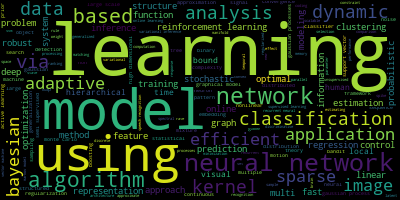

In [15]:
# Visualize the word cloud
wordcloud.to_image()

# Prepare the text for LDA analysis

In [16]:
##### The main text analysis method that we will use is Latent Dirichlet Allocation


##### LDA is able to perform topic detection on large document sets, determining what the main 'topics' are in a large unlabeled set of texts

##### A 'topic' is a collection of words that tend to co-occur often. 
    
##### The hypothesis is that LDA might be able to clarify what the different topics in the research titles are. These topics can then be used as a starting point for further analysis.

##### LDA does not work directly on text data. First, it is necessary to convert the documents into a simple vector representation. This representation will then be used by LDA to determine the topics. 

##### Each entry of a 'document vector' will correspond with the number of times a word occurred in the document.

##### In conclusion, we will convert a list of titles into a list of vectors, all with length equal to the vocabulary. 

##### For example, 'Analyzing machine learning trends with neural networks.' would be transformed into [1, 0, 1, ..., 1, 0].


##### We'll then plot the 10 most common words based on the outcome of this operation. these words should also occur in the word cloud





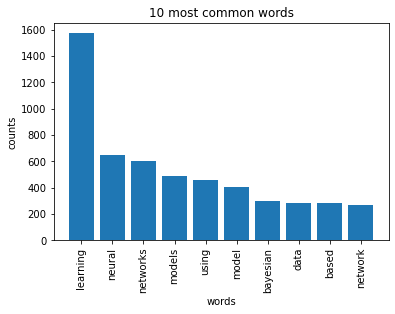

In [17]:
######  Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

###### Helper function

def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()


    
    
    
###### Initialise the count vectorizer with the English stopwords
count_vectorizer = CountVectorizer(stop_words='english')

###### Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

###### Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


# Analyzing trends with LDA

In [20]:
####### Finally, the research titles will be analyzed using LDA.

####### From there, we can distinguish what each topic is about ('neural networks', 'reinforcement learning', 'kernel methods', 'gaussian processes')


import warnings
warnings.simplefilter("ignore", DeprecationWarning)




# Load the LDA model from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
    
####### Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
        
####### Tweak the two parameters below 
number_topics = 10
number_words = 10

####### Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

####### Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)







Topics found via LDA:

Topic #0:
learning algorithms efficient optimization online multi large functions convex stochastic

Topic #1:
learning supervised visual semi human approach networks deep carlo monte

Topic #2:
models inference graphical variational bayesian propagation optimization belief probabilistic programming

Topic #3:
gaussian regression process processes linear kernel sparse learning non random

Topic #4:
neural clustering using networks network analog vlsi processing time model

Topic #5:
time learning gradient decision policy descent sampling bayesian models markov

Topic #6:
learning analysis neurons information random using spiking order plasticity generative

Topic #7:
learning model vector feature based reinforcement support selection latent machines

Topic #8:
recognition high data sparse dimensional estimation analysis bandits rank models

Topic #9:
neural networks network recurrent training model convolutional deep recognition based
